In [86]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro, normaltest, anderson
from joblib import Parallel, delayed
import statsmodels.api as sm

In [87]:
# Load dataset
file_path = r"C:\Users\Luís Pinto Coelho\Desktop\Análise e visualização de dados complexos agro-ambientais\exercices\ex_4\DataIn\EFIplus_medit.csv"
df = pd.read_csv(file_path, encoding="utf-8", sep=";")

In [88]:
# Normalization of column names by stripping spaces and converting to lowercase
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [89]:
# Check column existence
required_columns = ['temp_ann', 'salmo_trutta_fario', 'actual_river_slope']
for col in required_columns:
    if col not in df.columns:
        raise KeyError(f"Column '{col}' not found. Available columns: {df.columns.tolist()}")

In [90]:
# Sampling and estimation of mean annual temperature (Temp_ann)
sample_sizes = [10, 50, 100, 150, 200, 250, 300, 500, 1000]


In [91]:
# Parallelized function to compute sample means
def sample_mean(n):
    return [df['temp_ann'].sample(n=n, replace=True).mean() for _ in range(1000)]

sample_means = Parallel(n_jobs=-1)(delayed(sample_mean)(size) for size in sample_sizes)
sample_means_dict = dict(zip(sample_sizes, sample_means))

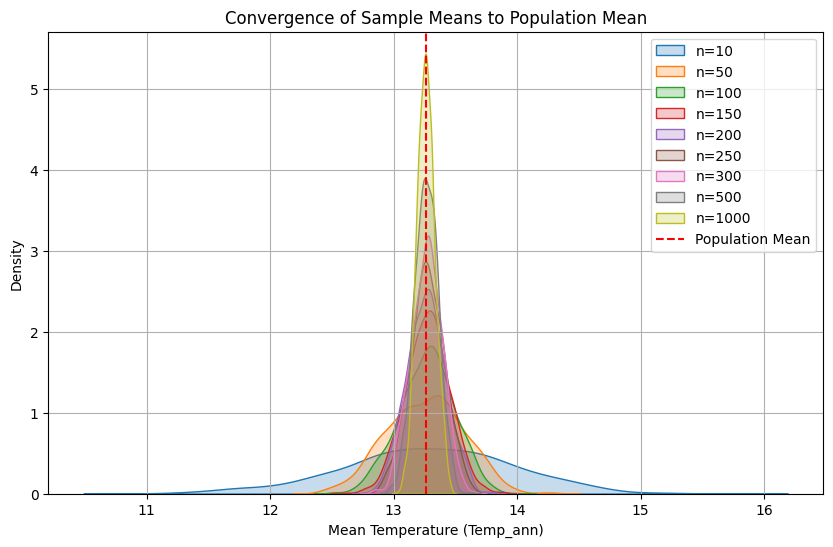

In [92]:
# Plot sample means convergence
plt.figure(figsize=(10, 6))
for size in sample_sizes:
    sns.kdeplot(sample_means_dict[size], label=f"n={size}", fill=True)
plt.axvline(df['temp_ann'].mean(), color="red", linestyle="dashed", label="Population Mean")
plt.legend()
plt.xlabel("Mean Temperature (Temp_ann)")
plt.ylabel("Density")
plt.title("Convergence of Sample Means to Population Mean")
plt.grid()
plt.show()


In [93]:
# Descriptive statistics for temperatura samples
sample_stats = pd.DataFrame({
    "Sample Size": sample_sizes,
    "Mean": [np.mean(sample_means_dict[size]) for size in sample_sizes],
    "Std Dev": [np.std(sample_means_dict[size]) for size in sample_sizes]
})
print("Descriptive Statistics for Sample Means:")
print(sample_stats)

Descriptive Statistics for Sample Means:
   Sample Size       Mean   Std Dev
0           10  13.277056  0.693064
1           50  13.253380  0.309830
2          100  13.266400  0.223982
3          150  13.271595  0.179147
4          200  13.262071  0.157045
5          250  13.268303  0.141190
6          300  13.261874  0.127312
7          500  13.261344  0.096847
8         1000  13.259194  0.071102


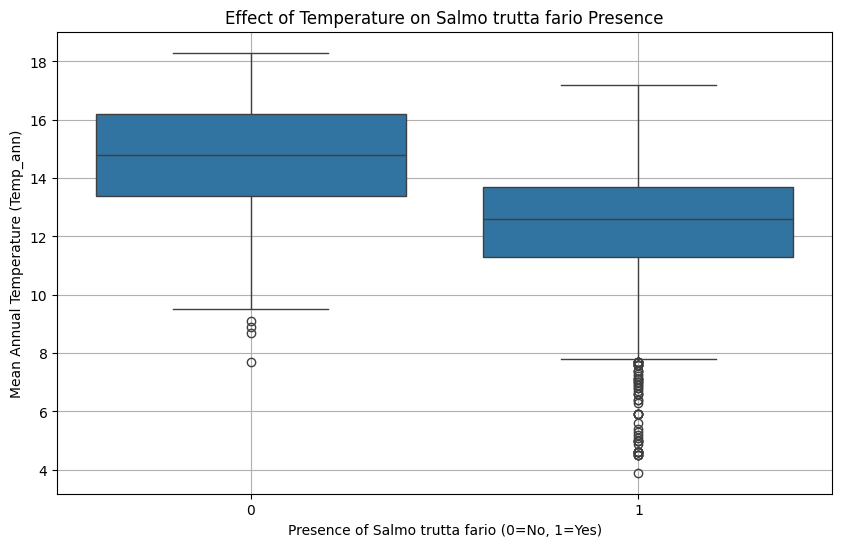

In [94]:
# Effects of Temperature on Salmo trutta fario presence
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['salmo_trutta_fario'], y=df['temp_ann'])
plt.xlabel("Presence of Salmo trutta fario (0=No, 1=Yes)")
plt.ylabel("Mean Annual Temperature (Temp_ann)")
plt.title("Effect of Temperature on Salmo trutta fario Presence")
plt.grid()
plt.show()

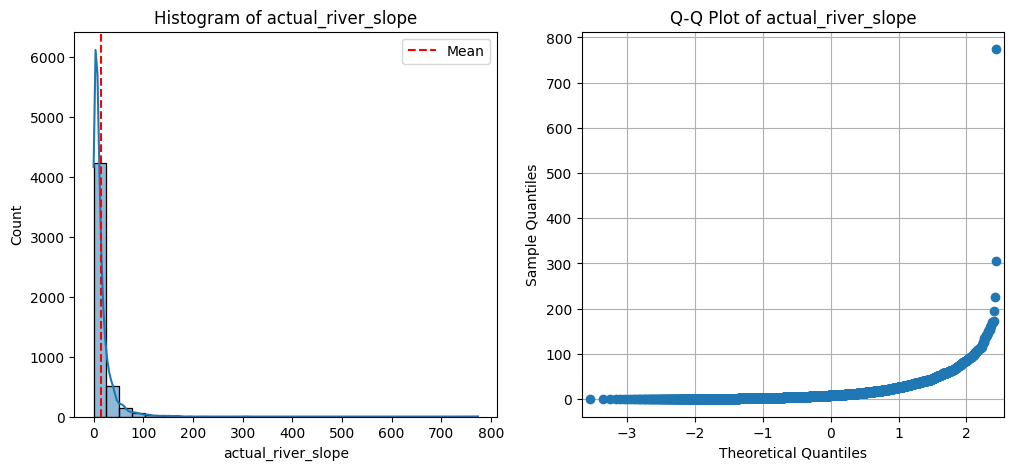

In [95]:
# Test normality of actual_river_slope
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['actual_river_slope'], kde=True, bins=30, ax=axes[0])
axes[0].axvline(df['actual_river_slope'].mean(), color="red", linestyle="dashed", label="Mean")
axes[0].set_title("Histogram of actual_river_slope")
axes[0].legend()
sm.qqplot(df['actual_river_slope'], line='s', ax=axes[1])
axes[1].set_title("Q-Q Plot of actual_river_slope")
plt.grid()
plt.show()

In [96]:
# Normality tests
print("\nNormality tests for actual_river_slope:")
for test, name in [(shapiro, "Shapiro-Wilk"), (normaltest, "D’Agostino’s K²")]:
    stat, p = test(df['actual_river_slope'].dropna())
    print(f"{name} Test: Statistic={stat:.4f}, p={p:.4f}")

result = anderson(df['actual_river_slope'].dropna())
print(f"Anderson-Darling Test: Statistic={result.statistic:.4f}")
print("Critical Values:", result.critical_values)
print("Significance Levels:", result.significance_level)


Normality tests for actual_river_slope:
Shapiro-Wilk Test: Statistic=0.5163, p=0.0000
D’Agostino’s K² Test: Statistic=8128.0377, p=0.0000
Anderson-Darling Test: Statistic=541.4514
Critical Values: [0.576 0.655 0.786 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]


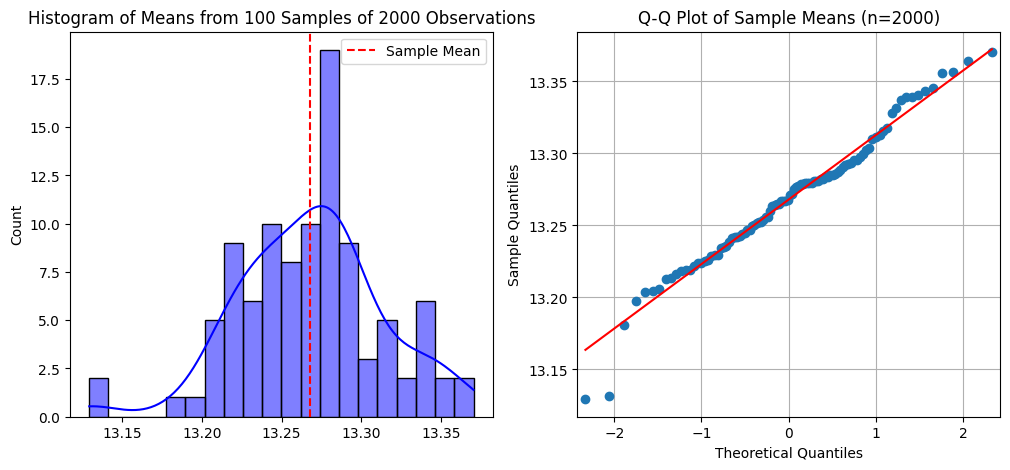

In [97]:
# Histogram of sample means from 1000 samples of 2000 observations
temp_means_2000 = [df['temp_ann'].sample(n=2000, replace=True).mean() for _ in range(100)]
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(temp_means_2000, kde=True, bins=20, color="blue", ax=axes[0])
axes[0].axvline(np.mean(temp_means_2000), color="red", linestyle="dashed", label="Sample Mean")
axes[0].set_title("Histogram of Means from 100 Samples of 2000 Observations")
axes[0].legend()
sm.qqplot(np.array(temp_means_2000), line='s', ax=axes[1])
axes[1].set_title("Q-Q Plot of Sample Means (n=2000)")
plt.grid()
plt.show()

In [98]:
# Normality test for the sample means
print("\nNormality tests for sample means (n=2000):")
for test, name in [(shapiro, "Shapiro-Wilk"), (normaltest, "D’Agostino’s K²")]:
    stat, p = test(temp_means_2000)
    print(f"{name} Test: Statistic={stat:.4f}, p={p:.4f}")

result = anderson(temp_means_2000)
print(f"Anderson-Darling Test for Sample Means: Statistic={result.statistic:.4f}")
print("Critical Values:", result.critical_values)
print("Significance Levels:", result.significance_level)

print("\nAnalysis Completed Successfully!")



Normality tests for sample means (n=2000):
Shapiro-Wilk Test: Statistic=0.9797, p=0.1254
D’Agostino’s K² Test: Statistic=2.7861, p=0.2483
Anderson-Darling Test for Sample Means: Statistic=0.4758
Critical Values: [0.555 0.632 0.759 0.885 1.053]
Significance Levels: [15.  10.   5.   2.5  1. ]

Analysis Completed Successfully!
